# Spectral Graph K-partitioning

Instead of using recursive spectral bipartitioning, the graph $k$-partitioning problem can be solved using $k$ eigenvectors which correspond to $k$ smallest eigenvalues of Laplaciain matrix or normalized Laplacian matrix, respectively.

Suggested reading is [U. von Luxburg, A Tutorial on Spectral Clustering][Lux07], which includes the quote _"spectral clustering cannot serve as a “black box algorithm” which automatically detects the correct clusters in any
given data set. But it can be considered as a powerful tool which can produce good results if applied with care."_

[Lux07]: https://arxiv.org/abs/0711.0189 "U. von Luxburg, 'A Tutorial on Spectral Clustering', arXiv:0711.0189 [cs.DS]"

## Prerequisites

The reader should be familiar with k-means algorithm, spectral graph bipartitioning and 
recursive bipartitioning.
 
## Competences 

The reader should be able to apply graph spectral k-partitioning to data clustering problems.

__Credits.__ The notebook is based on [I. Mirošević, Spectral Graph Partitioning and Application to Knowledge Extraction][Mir05].

[Mir05]: http://empty.link "I. Mirošević, 'Spectral Graph Partitioning and Application to Knowledge Extraction', M.Sc. Thesis, Iniversity of Zagreb, 2005 (in Croatian)." 

## The relaxed problem

Let $G=(V,E)$ be a weighted graph with weights $\omega$, with weights matrix $W$, Laplacian matrix $L=D-W$, and normalized Laplacian matrix $L_n=D^{-1/2}(D-W)D^{-1/2}$. 

Let the $k$-partition $\pi_k =\{V_{1},V_{2},...,V_{k}\}$, the cut $cut(\pi_k)$, 
the proportional cut $pcut(\pi_k)$ and 
the normalized cut $ncut(\pi_k)$ be defined as in the
[Spectral Graph Bipartitioning](L10%20Spectral%20Graph%20Bipartitioning.ipynb) notebook.

### Definition

_Partition vectors_ of a $k$-partition $\pi_k$ are
\begin{align*}
h_{1} &=[\overset{\displaystyle |V_{1}|}{\overbrace{1,\cdots
,1}},0,\cdots
,0,\cdots ,0,\cdots ,0]^{T}  \\
h_{2} &=[0,\cdots
,0,\overset{\displaystyle |V_{2}|}{\overbrace{1,\cdots ,1}} ,\cdots ,0,\cdots
,0]^{T} \\
&\vdots \\
h_{k} &=[0,\cdots ,0,0,\cdots ,0,\cdots
,\overset{\displaystyle |V_{k}|}{ \overbrace{1,\cdots ,1}}]^{T}.
\end{align*}

### Facts

1. Set
\begin{align*}
X&=\begin{bmatrix} x_1 & x_2 &\cdots & x_k \end{bmatrix}, \quad 
x_i=\displaystyle \frac{h_i}{\|h_i\|_2}, \\
Y&=\begin{bmatrix} y_1 & y_2 &\cdots & y_k \end{bmatrix}, \quad
y_i=\displaystyle \frac{D^{1/2}h_i}{\|D^{1/2}h_i\|_2}.
\end{align*}
It holds
\begin{align*}
& cut(V_{i},V\backslash V_{i})=h_{i}^{T}(D-W)h_{i}=h_{i}^{T}L h_{i},\quad 
\omega( C_{i})=h_{i}^{T}D h_{i},\quad |C_{i}| =h_{i}^{T}h_{i},\\
& pcut(\pi_k) =\frac{h_{1}^{T}L h_{1}}{h_{1}^{T} h_{1}}+
\cdots + \frac{h_{k}^{T}L h_{k}}{h_{k}^{T}h_{k}}
=x_{1}^{T}L x_{1}+\cdots +x_{k}^{T}Lx_{k}=\mathop{\mathrm{trace}}(X^{T}LX),\\
& ncut(\pi_k)=\frac{h_{1}^{T}L h_{1}}{h_{1}^{T}D h_{1}}+\cdots
+\frac{h_{k}^{T}L h_{k}}{h_{k}^{T}D h_{k}}
=\mathop{\mathrm{trace}}(Y^{T}L_{n}Y).
\end{align*}

2. The _relaxed_ $k$-partitioning problems are trace-minimization problems,
\begin{align*}
\min_{\displaystyle \pi_k} pcut(\pi_k) &\geq
\underset{\displaystyle X\in\mathbb{R}^{n\times k}}{\min_{\displaystyle X^{T}X=I}}
\mathop{\mathrm{trace}}(X^{T}LX),\\
\min_{\displaystyle \pi_k} ncut(\pi_k) &\geq
\underset{\displaystyle Y\in\mathbb{R}^{n\times
k}}{\min_{\displaystyle Y^{T}Y=I}}\mathop{\mathrm{trace}}(Y^{T}L_{n}Y).
\end{align*}

3. __Ky-Fan  Theorem.__ Let $A\in \mathbb{R}^{n\times n}$ be a symmetric matrix with
eigenvalues $\lambda _1\leq \cdots \leq \lambda_n$. Then
$$
\underset{\displaystyle Z^TZ=I}{\min_{\displaystyle Z\in \mathbb{R}^{n\times
k}}}\mathop{\mathrm{trace}}\left(Z^{T}AZ\right)
=\sum_{i=1}^{k}\lambda_{i}.
$$

4. Let $\lambda_1\leq \cdots \leq \lambda_n$ be the eigenvalues of $L$ with eigenvectors 
$v^{[1]},\cdots ,v^{[k]}$. The solution of the relaxed proportional cut problem is the matrix $X=\begin{bmatrix}v^{[1]} & \cdots & v^{[k]}\end{bmatrix}$, and it holds
$\min\limits_{\displaystyle \pi_k} pcut(\pi_k)\geq \sum\limits_{i=1}^k \lambda_i$.

5. Let $\mu_1\leq \cdots \leq \mu_n$ be the eigenvalues of $L_n$ with eigenvectors 
$w^{[1]},\cdots ,w^{[k]}$. The solution of the relaxed normalized cut problem is the matrix $Y=\begin{bmatrix}w^{[1]} & \cdots & w^{[k]}\end{bmatrix}$, and it holds
$\min\limits_{\displaystyle \pi_k} ncut(\pi_k)\geq \sum\limits_{i=1}^k \mu_i$.

6. It remains to recover the $k$-partition. The k-means algorithm applied to rows of the matrices $X$ or $D^{-1/2}Y$, will compute the $k$ centers and the assignment vector whose $i$-th component denotes the subset $V_j$ to which the vertex $i$ belongs.

### Example - Graph with three clusters

In [1]:
# Some packages
using LightGraphs
using GraphPlot
using Clustering

In [2]:
# Some functions
using SparseArrays
using LinearAlgebra
function my_weight_matrix(src::Array,dst::Array,weights::Array)
    n=nv(G)
    sparse([src;dst],[dst;src],[weights;weights],n,n)
end

my_laplacian(W::AbstractMatrix)=spdiagm(0=>vec(sum(W,dims=2)))-W

function my_normalized_laplacian(L::AbstractMatrix)
    D=1.0./sqrt.(diag(L))
    n=length(D)
    [L[i,j]*(D[i]*D[j]) for i=1:n, j=1:n]
end

my_normalized_laplacian (generic function with 1 method)

In [3]:
# Sources, targets, and weights
n=9
sn=[1,1,1,2,2,2,3,3,5,6,7,7,8]
tn=[2,3,4,3,4,7,4,5,6,9,8,9,9]
wn=[2,3,4,4,5,1,6,1,7,1,4,3,2]
[sn tn wn]

13×3 Array{Int64,2}:
 1  2  2
 1  3  3
 1  4  4
 2  3  4
 2  4  5
 2  7  1
 3  4  6
 3  5  1
 5  6  7
 6  9  1
 7  8  4
 7  9  3
 8  9  2

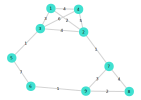

In [4]:
# What is the optimal tripartition?
G=Graph(n)
for i=1:length(sn)
    add_edge!(G,sn[i],tn[i])
end
gplot(G, nodelabel=1:n, edgelabel=wn)

In [5]:
W=my_weight_matrix(sn,tn,wn)
L=my_laplacian(W)
Ln=my_normalized_laplacian(L)

9×9 Array{Float64,2}:
  1.0       -0.19245   -0.267261   …   0.0        0.0        0.0     
 -0.19245    1.0       -0.308607      -0.102062   0.0        0.0     
 -0.267261  -0.308607   1.0            0.0        0.0        0.0     
 -0.344265  -0.372678  -0.414039       0.0        0.0        0.0     
  0.0        0.0       -0.0944911      0.0        0.0        0.0     
  0.0        0.0        0.0        …   0.0        0.0       -0.144338
  0.0       -0.102062   0.0            1.0       -0.57735   -0.433013
  0.0        0.0        0.0           -0.57735    1.0       -0.333333
  0.0        0.0        0.0           -0.433013  -0.333333   1.0     

In [6]:
Matrix(L)

9×9 Array{Int64,2}:
  9  -2  -3  -4   0   0   0   0   0
 -2  12  -4  -5   0   0  -1   0   0
 -3  -4  14  -6  -1   0   0   0   0
 -4  -5  -6  15   0   0   0   0   0
  0   0  -1   0   8  -7   0   0   0
  0   0   0   0  -7   8   0   0  -1
  0  -1   0   0   0   0   8  -4  -3
  0   0   0   0   0   0  -4   6  -2
  0   0   0   0   0  -1  -3  -2   6

In [7]:
# Proportional cut. The clustering is visible in 
# the components of v_2 and v_3
# λ,Y=eigs(L,nev=3,which=:SM)
λ,Y=eigen(Matrix(L))

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
9-element Array{Float64,1}:
  1.3075959994231213e-15
  0.7885231802373414    
  1.2104922881233313    
  7.921378109200696     
 11.144996358340585     
 12.072995409320564     
 14.9477969457212       
 17.081925345732493     
 20.83189236332376      
eigenvectors:
9×9 Array{Float64,2}:
 -0.333333  -0.383624   -0.121476    0.0235983    …   0.187486    0.0968788  
 -0.333333  -0.323492   -0.129956   -0.00471412       0.685362    0.17578    
 -0.333333  -0.344649   -0.0752859  -0.000804123     -0.602597    0.564156   
 -0.333333  -0.367298   -0.115116    0.00932357      -0.269546   -0.797572   
 -0.333333   0.0953074   0.612081   -0.112768         0.170526   -0.0625801  
 -0.333333   0.147422    0.60443    -0.0011517    …  -0.135159    0.0341236  
 -0.333333   0.355516   -0.282486   -0.109825        -0.099815   -0.014996   
 -0.333333   0.424836   -0.311411   -0.592944         0.029925    0.00401854 
 -0.333333   0.39

In [8]:
out=kmeans(Matrix(transpose(Y[:,1:3])),3)

KmeansResult{Array{Float64,2},Float64,Int64}([-0.333333 -0.333333 -0.333333; -0.354766 0.121365 0.392111; -0.110459 0.608256 -0.258226], [1, 1, 1, 1, 2, 2, 3, 3, 3], [0.000954196, 0.00135823, 0.00133947, 0.000178756, 0.000693622, 0.000693622, 0.00192775, 0.00389961, 0.00601275], [4, 2, 3], [4, 2, 3], 0.01705799833403926, 2, true)

In [9]:
# Normalized cut
# Lanczos cannot be used for the "smallest in magnitude"
# eienvalues of a singular matrix
# λ,Y=eigs(Ln,nev=3,which=:SM) 
μ,Y=eigen(Ln)
Y=Y[:,1:3]
D=sqrt.(diag(L))
Y=Diagonal(1.0./D)*Y
out=kmeans(Matrix(transpose(Y)),3)

KmeansResult{Array{Float64,2},Float64,Int64}([-0.107833 -0.107833 -0.107833; 0.0909339 -0.104042 -0.144522; 0.011189 -0.19892 0.131546], [1, 1, 1, 1, 2, 2, 3, 3, 3], [6.01793e-5, 0.000196695, 0.000160142, 3.37657e-5, 8.23425e-5, 8.23425e-5, 0.00019114, 0.000443174, 0.000779667], [4, 2, 3], [4, 2, 3], 0.0020294476493124894, 2, true)

### Example - Concentric rings

In [10]:
using Plots
using Distances

In [11]:
function plotKpartresult(C::Vector,X::Array)
    k=maximum(C)
    # Clusters
    scatter(X[1,findall(C.==1)],X[2,findall(C.==1)])
    for j=2:k
        scatter!(X[1,findall(C.==j)],X[2,findall(C.==j)])
    end
    scatter!()
end

plotKpartresult (generic function with 1 method)

In [12]:
# Generate concentric rings
k=3
import Random
Random.seed!(421)
# Center
center=[0;0]
# Radii
radii=Random.randperm(10)[1:k]
# Number of points in circles
sizes=rand(300:500,k)
center,radii,sizes

([0, 0], [8, 5, 4], [409, 436, 399])

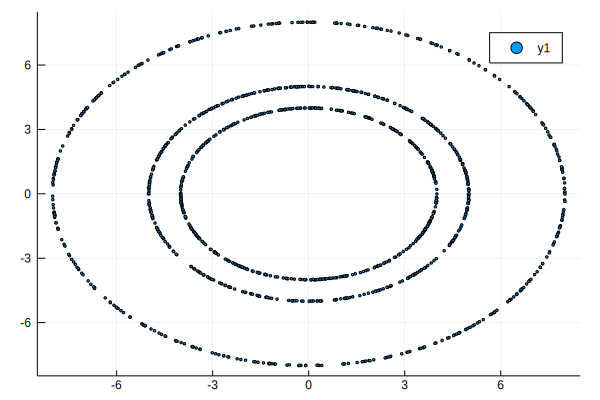

In [14]:
# Points
m=sum(sizes)
X=Array{Float64}(undef,2,m)
first=0
last=0
for j=1:k
    first=last+1
    last=last+sizes[j]
    # Random angles
    ϕ=2*π*rand(sizes[j])
    for i=first:last
        l=i-first+1
        X[:,i]=center+radii[j]*[cos(ϕ[l]);sin(ϕ[l])]+(rand(2).-0.5)/50
    end
end
scatter(X[1,:],X[2,:],markersize=1)

In [15]:
S=pairwise(SqEuclidean(),X,dims=2)
# W=exp.(-pairwise(SqEuclidean(),X)/σ^2)-I
# S=pairwise(Cityblock(),X)
β=20.0 # 1.0

20.0

In [16]:
W=exp.(-β*S)-I;

In [17]:
L=my_laplacian(W)
Ln=my_normalized_laplacian(L);

λ = [-6.07597e-17, -1.23513e-16, 4.20551e-9]


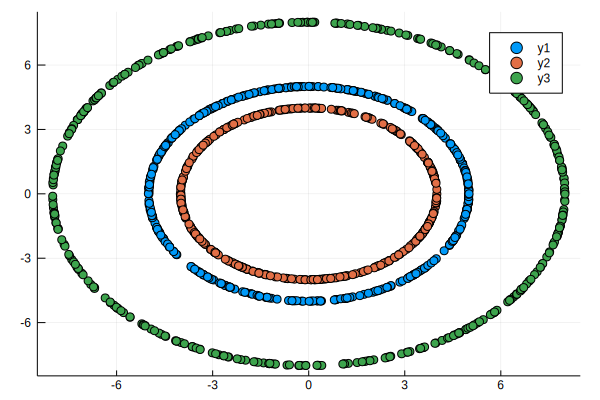

In [18]:
# Normalized Laplacian
λ,Y=eigen(Ln)
sp=sortperm(abs.(λ))[1:k]
λ=λ[sp]
Y=Y[:,sp]
@show λ
Y=Diagonal(1.0./sqrt.(diag(L)))*Y
out=kmeans(Matrix(transpose(Y)),k)
plotKpartresult(out.assignments,X)

λ = [-2.18829e-16, -2.41087e-16, 2.51903e-8]


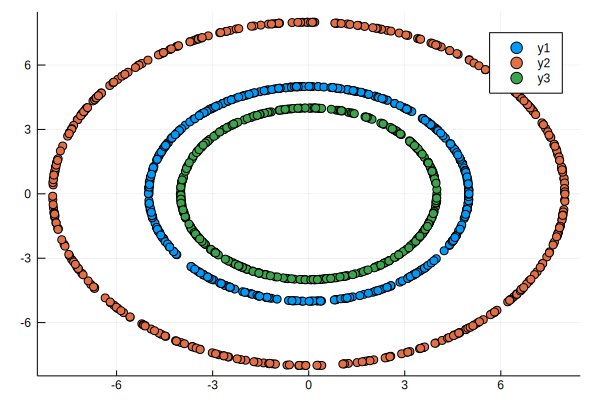

In [19]:
# Laplacian
λ,Y=eigen(L)
sp=sortperm(abs.(λ))[1:k]
λ=λ[sp]
Y=Y[:,sp]
@show λ
out=kmeans(Matrix(transpose(Y)),k)
plotKpartresult(out.assignments,X)